In [11]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_red = pd.read_csv("winequality-red.csv")

In [13]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Let's start with some basic, multiple linear regression

Mean Squared Error (MSE): 0.39
R-squared (R²): 0.40


Text(0, 0.5, 'actual quality')

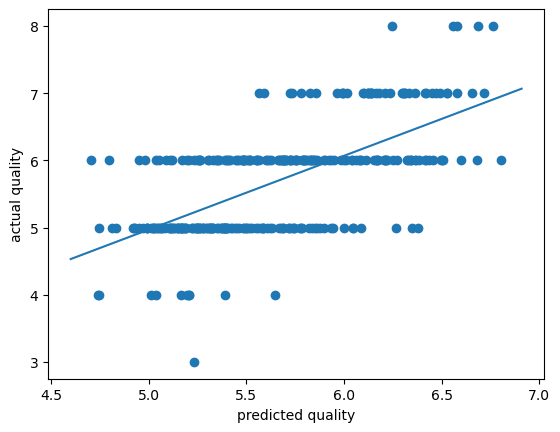

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress

df = df_red

# Step 1: Separate features (X) and target (y)
X = df.iloc[:, :-1]   # All columns except the last one
y = df.iloc[:, -1]    # The last column (quality)

# Step 2: Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

f,ax = plt.subplots(1,1)
ax.scatter(y_pred, y_test)
x = np.array(ax.get_xlim())

linfit = linregress(y_pred, y_test)
ax.plot(x,x*linfit.slope + linfit.intercept)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")

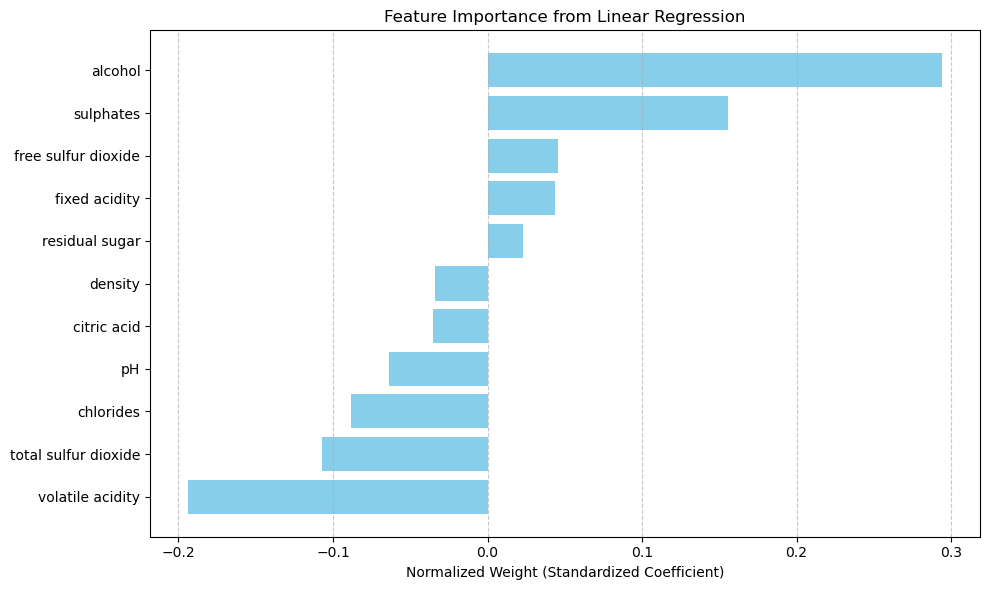

In [15]:
# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression on standardized features
model = LinearRegression()
model.fit(X_scaled, y)

# Get normalized (standardized) coefficients
normalized_weights = pd.DataFrame({
    'Feature': X.columns,
    'Normalized Weight': model.coef_
})



import matplotlib.pyplot as plt

# Sort features by absolute weight (optional but useful for visualization)
normalized_weights['Abs Weight'] = normalized_weights['Normalized Weight']
normalized_weights_sorted = normalized_weights.sort_values(by='Abs Weight', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(normalized_weights_sorted['Feature'], normalized_weights_sorted['Normalized Weight'], color='skyblue')
plt.xlabel('Normalized Weight (Standardized Coefficient)')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [16]:
df_white = pd.read_csv("winequality-white.csv")

In [17]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Mean Squared Error (MSE): 0.57
R-squared (R²): 0.27


Text(0, 0.5, 'actual quality')

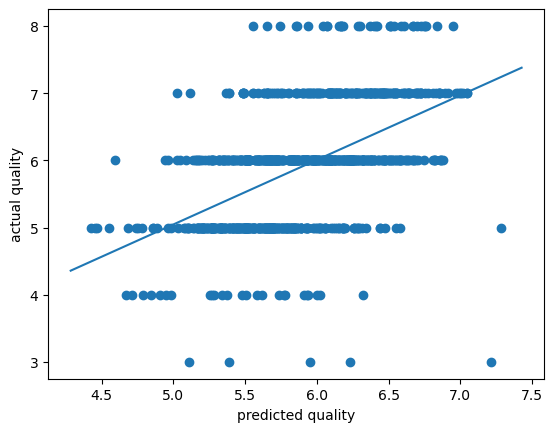

In [18]:
df = df_white

# Step 1: Separate features (X) and target (y)
X = df.iloc[:, :-1]   # All columns except the last one
y = df.iloc[:, -1]    # The last column (quality)

# Step 2: Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

f,ax = plt.subplots(1,1)
ax.scatter(y_pred, y_test)
x = np.array(ax.get_xlim())

linfit = linregress(y_pred, y_test)
ax.plot(x,x*linfit.slope + linfit.intercept)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")

                 Feature  Normalized Weight
3         residual sugar           0.413243
10               alcohol           0.238071
8                     pH           0.103628
9              sulphates           0.072060
5    free sulfur dioxide           0.063477
0          fixed acidity           0.055285
2            citric acid           0.002673
4              chlorides          -0.005402
6   total sulfur dioxide          -0.012142
1       volatile acidity          -0.187779
7                density          -0.449440


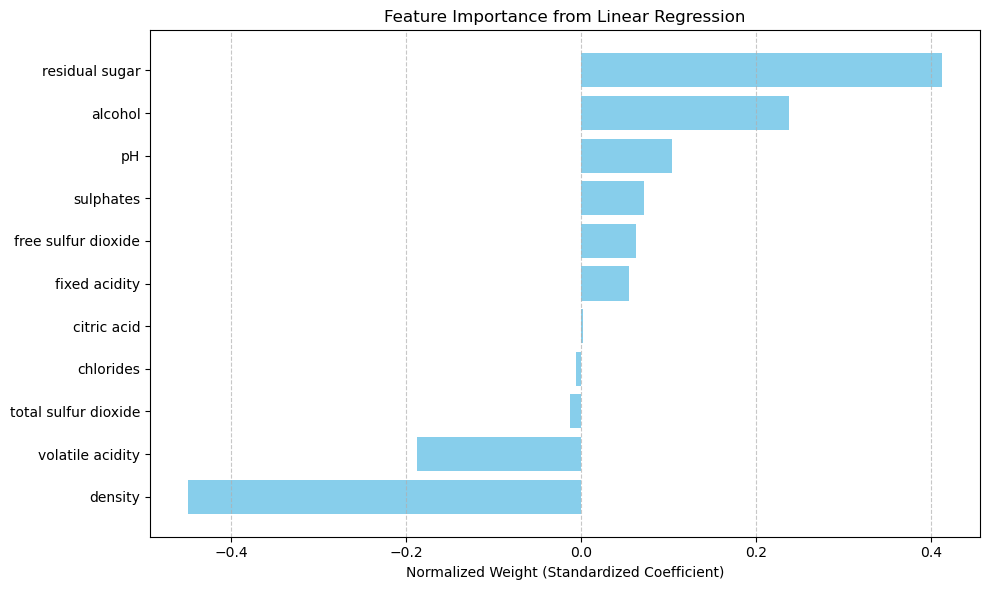

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression on standardized features
model = LinearRegression()
model.fit(X_scaled, y)

# Get normalized (standardized) coefficients
normalized_weights = pd.DataFrame({
    'Feature': X.columns,
    'Normalized Weight': model.coef_
})

# Display results
print(normalized_weights.sort_values(by='Normalized Weight', ascending=False))

# Sort features by absolute weight (optional but useful for visualization)
normalized_weights['Abs Weight'] = normalized_weights['Normalized Weight']
normalized_weights_sorted = normalized_weights.sort_values(by='Abs Weight', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(normalized_weights_sorted['Feature'], normalized_weights_sorted['Normalized Weight'], color='skyblue')
plt.xlabel('Normalized Weight (Standardized Coefficient)')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load datasets
df_red = pd.read_csv("winequality-red.csv")
df_white = pd.read_csv("winequality-white.csv")

# Add label column
df_red['wine_type'] = 0  # Red = 0
df_white['wine_type'] = 1  # White = 1

# Combine datasets
df_combined = pd.concat([df_red, df_white], ignore_index=True)

X = df_combined.drop('wine_type', axis=1)
y = df_combined['wine_type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)



In [21]:
# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [22]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[237   3]
 [  2 733]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       240
           1       1.00      1.00      1.00       735

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975



In [23]:
# Coefficients: which features help distinguish red vs white
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_[0]
}).sort_values(by='Weight', ascending=False)

print(feature_importance)


                 Feature    Weight
3         residual sugar  3.068085
6   total sulfur dioxide  2.917438
2            citric acid  0.526933
11               quality -0.173172
8                     pH -0.549945
0          fixed acidity -0.624311
9              sulphates -0.808373
10               alcohol -0.904377
5    free sulfur dioxide -0.905628
4              chlorides -1.141582
1       volatile acidity -1.157671
7                density -2.955644


In [24]:
X_test.shape

(975, 12)

In [25]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy

model = Sequential([
    Dense(units=12, activation="sigmoid"),
    Dense(units=6, activation="sigmoid"),
    Dense(units=1, activation="sigmoid"),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# model.fit(X_train, y_train, epochs=100)
model.fit(X_train, y_train, epochs=100, verbose=0)


In [26]:
y_pred = model.predict(X_test)

correct_red = np.sum(np.array(y_test)*y_pred[:,0].round())
total_red = np.sum(y_test)

correct_white = np.sum(np.array(1-y_test)*(1-y_pred)[:,0].round())
total_white = np.sum(1-y_test)

print(f"correctly labelled red wines: {correct_red} out of {total_red}")
print(f"correctly labelled white wines: {correct_white} out of {np.sum(total_white)}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
correctly labelled red wines: 733.0 out of 735
correctly labelled white wines: 239.0 out of 240


In [27]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9985 - loss: 0.0084 - precision: 0.9997 - recall: 0.9984


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


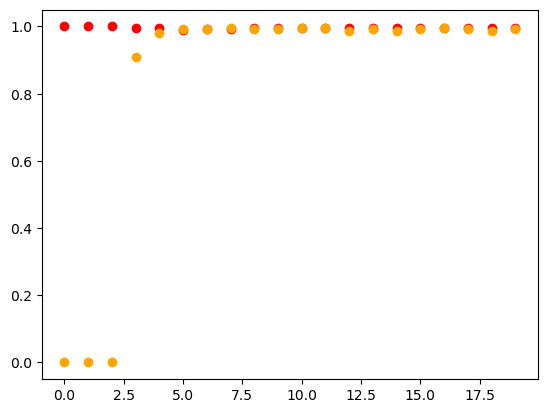

In [28]:
f,ax = plt.subplots(1,1)

for i in range(20):
    model = Sequential([
    Dense(units=12, activation="sigmoid"),
    Dense(units=6, activation="sigmoid"),
    Dense(units=1, activation="sigmoid"),
    ])

    model.compile(loss=BinaryCrossentropy())

    # model.fit(X_train, y_train, epochs=i)
    model.fit(X_train, y_train, epochs=i, verbose=0)
    y_pred = model.predict(X_test)

    correct_red = np.sum(np.array(y_test)*y_pred[:,0].round())
    total_red = np.sum(y_test)

    correct_white = np.sum(np.array(1-y_test)*(1-y_pred)[:,0].round())
    total_white = np.sum(1-y_test)

    ax.scatter(i, correct_red/total_red, marker="o", color="red")
    ax.scatter(i, correct_white/total_white, marker="o", color="orange")

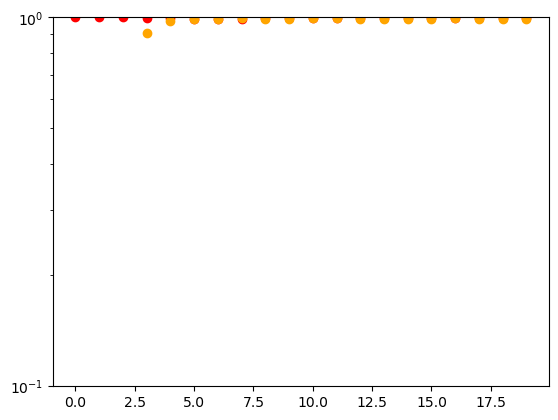

In [29]:
ax.semilogy()
ax.set_ylim([.1,ax.get_ylim()[1]])
f

In [30]:
y.value_counts()


wine_type
1    4898
0    1599
Name: count, dtype: int64

In [31]:
df_red = pd.read_csv("winequality-red.csv")
df_white = pd.read_csv("winequality-white.csv")

# Add label column
df_red['wine_type'] = 0  # Red = 0
df_white['wine_type'] = 1  # White = 1

# Combine datasets
df_combined = pd.concat([df_red, df_white], ignore_index=True)

min_count = 20  # for example, remove any quality class with <10 instances
count_series = df_combined["quality"].value_counts()
valid_qualities = count_series[count_series >= min_count].index
df_filtered = df_combined[df_combined["quality"].isin(valid_qualities)]

X = df_filtered.drop('wine_type', axis=1).drop('quality', axis=1)
y = df_filtered['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [32]:
from keras.losses import MeanSquaredError

# model = Sequential([
#     Dense(units=15, activation="relu"),
#     Dense(units=10, activation="relu"),
#     Dense(units=5, activation="relu"),
#     Dense(units=1, activation="relu"),
# ])

model = Sequential([
    Dense(units=15, activation=None),
    Dense(units=10, activation="relu"),
    Dense(units=5, activation="relu"),
    Dense(units=1, activation="relu"),
])


model.compile(optimizer='adam', loss=MeanSquaredError())

# model.fit(X_test, y_test, epochs=100)
model.fit(X_train, y_train, epochs=100, verbose=0)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


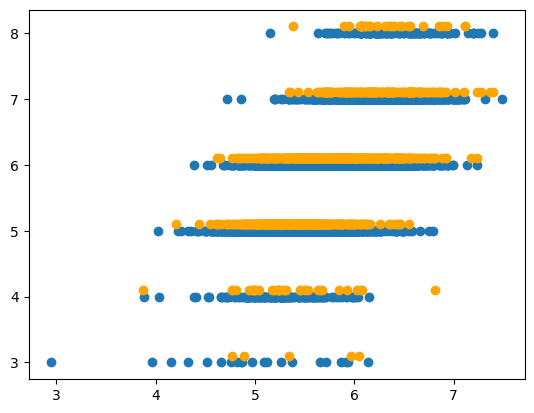

In [33]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_train), y_train, )
ax.scatter(model.predict(X_test), y_test+.1,color="orange")

In [34]:
from keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Dense(units=15, activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=5, activation="relu"),
    Dense(units=10, activation="linear"),
])


model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True))

# model.fit(X_train, y_train, epochs=100) #output with a progress bar
model.fit(X_train, y_train, epochs=100, verbose=0)


In [35]:
logits = model(X_test)
f_x = tf.nn.softmax(logits)
print(f_x.shape, y_test.shape)

(974, 10) (974,)


Text(0, 0.5, 'actual quality')

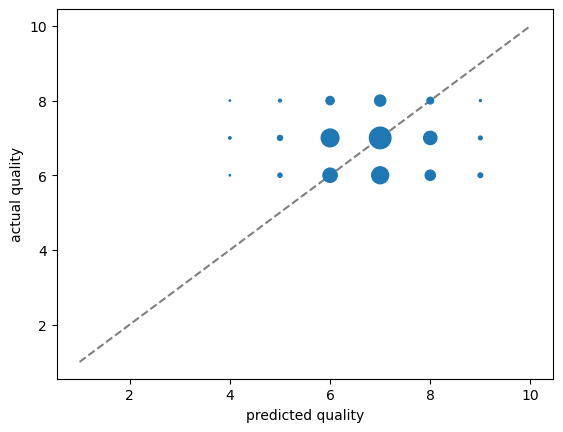

In [36]:
f,ax = plt.subplots(1,1)

x,y = np.arange(1,11),np.arange(1,11)
X,Y = np.meshgrid(x,y)

c = np.zeros((10,10))
for i,j in zip(
    np.argmax(f_x, axis=1), y_train
):
    c[i,j] += 1

ax.scatter(X,Y,c)
ax.plot(x,x, color="grey", linestyle="--", zorder=0)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")


## Let's do some model validation:
training data, cross validation data, and testing data

In [107]:
y_pred = model.predict(X_test).argmax(axis=1)  # Get class index
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
f,ax = plt.subplots(1,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

ax.set_xticks([0,1,2,3,4,5], labels=["3","4","5","6","7","8"])
ax.set_yticks([0,1,2,3,4,5], labels=["3","4","5","6","7","8"])
# ax.set_xticklabels()

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1

## Time for a decision tree

In [38]:
df_wordy = pd.read_csv("WineDataset.csv")
df_wordy

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",Although Denis Meunier is only in his late 20s...,£11.99 per bottle,75CL,Chenin Blanc,NaN,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,ABV 12.50%,Loire,Aromatic & Floral,2021,Vouvray
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",Waimea’s vineyards are less than 1km from the ...,£13.99 per bottle,75CL,Pinot Noir,NaN,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,ABV 13.00%,Nelson,Delicate & Dry,2021,NaN
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,Made from the very best fruit nourished by 40-...,£85.00 per bottle,75CL,Cabernet Sauvignon,NaN,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,ABV 13.50%,South Australia,Savoury & Full Bodied,2010,Clare Valley
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,"In 1961, Sir Robert Menzies said that Yalumba'...",£37.99 per bottle,75CL,Cabernet Sauvignon,NaN,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,ABV 14.50%,South Australia,Savoury & Full Bodied,2016,Coonawarra


In [39]:
df = df_wordy

prices,vintages,abvs = [],[],[]
for i,row in df.iterrows():

    vintage = row.Vintage
    price = row.Price
    abv = row.ABV
    if str(vintage).isnumeric() and " per bottle" in price:
        vintages.append(int(vintage))
        price = float(price.split(" per bottle")[0][1:])
        prices.append(price)
        abvs.append(float(abv[4:-1]))

prices,vintages,abvs = np.array(prices), np.array(vintages), np.array(abvs)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# ---- 1️⃣ Load and clean data ----
df_wordy = pd.read_csv("WineDataset.csv")
mask = df_wordy["Vintage"].astype(str).str.isnumeric() & df_wordy["Price"].str.contains(" per bottle")
df = df_wordy[mask].copy()
df.drop("Characteristics", axis=1)

# Extract price
df["Price_value"] = df["Price"].str.split(" per bottle").str[0].str[1:].astype(float)

# ---- 2️⃣ Combine text columns ----
text_columns = ["Grape", "Characteristics", "Region", "Style", "Appellation"]
df["text_for_model"] = df[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)

# ---- 3️⃣ Split data ----
X_train, X_test, y_train, y_test = train_test_split(df["text_for_model"], df["Price_value"],
                                                    test_size=0.7, random_state=42)

# ---- 4️⃣ Build pipeline ----
model = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words="english", max_features=1000)),  # limit features
    ("regressor", DecisionTreeRegressor(random_state=42, max_depth=10))
])

# ---- 5️⃣ Train ----
model.fit(X_train, y_train)

# ---- 6️⃣ Evaluate ----
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.3f}")



Root Mean Squared Error: 39.04
R^2 Score: -0.216


In [41]:
vectorizer = model.named_steps["vectorizer"]
regressor = model.named_steps["regressor"]

# All the words
feature_names = vectorizer.get_feature_names_out()

# Importance of each feature
importances = regressor.feature_importances_

word_importance = pd.DataFrame({
    "word": feature_names,
    "importance": importances
})
word_importance = word_importance.sort_values(by="importance", ascending=False)

# Show top 20 words
print(word_importance.head(40))


             word  importance
78     chardonnay    0.273077
9          almond    0.225310
385           wet    0.161298
21      australia    0.063425
85      chocolate    0.063383
365       vanilla    0.038036
238    montrachet    0.036359
203     liquorice    0.029124
348        toasty    0.018228
321       savoury    0.017762
290     raspberry    0.015607
76     chambertin    0.010871
46         bodied    0.007823
56       burgundy    0.006882
41     blackberry    0.006809
87       cinnamon    0.006563
312         saint    0.005464
196         lemon    0.005253
107         cream    0.003487
333         spicy    0.001557
298          rich    0.001249
40          black    0.001062
332         spice    0.000763
49       bordeaux    0.000390
180         honey    0.000173
178         herbs    0.000043
274         pinot    0.000002
284      provence    0.000000
267        pepper    0.000000
266     península    0.000000
265          pear    0.000000
207      lombardy    0.000000
208      l

### well, the below plot shows the model working quite well with the dataset! Low priced wines have overlapping features, but higher priced ones stand out...

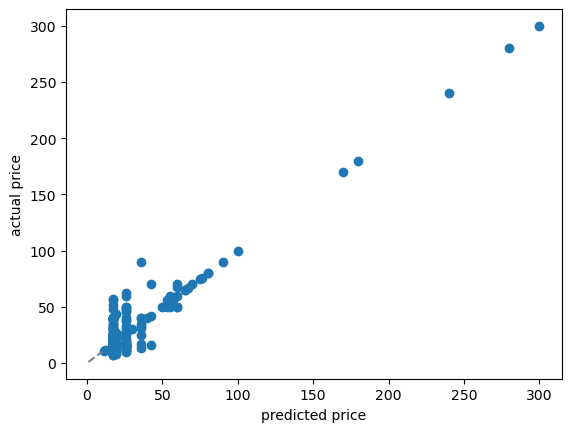

In [42]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_train), y_train)

ax.set_xlabel("predicted price")
ax.set_ylabel("actual price")
ax.plot(x,x, linestyle="--", color="grey")

### ...but the test data shows it doesn't work so well! Many wines have the features of very expensive wines, but don't actually come with a high pricetag

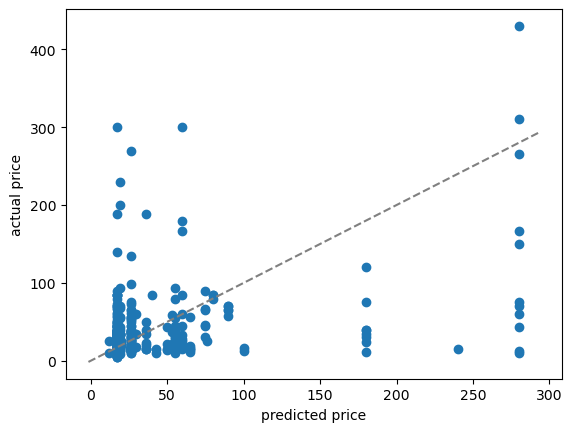

In [43]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_test), y_test)

ax.set_xlabel("predicted price")
ax.set_ylabel("actual price")
x = np.array(ax.get_xlim())
ax.plot(x,x, linestyle="--", color="grey")

## let's try a random forest instead

In [44]:
from sklearn.ensemble import RandomForestRegressor

# ---- 4️⃣ Build pipeline ----
model = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words="english", max_features=1000)),  # limit features
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test R^2: {r2:.3f}")


Test RMSE: 30.690
Test R^2: 0.249


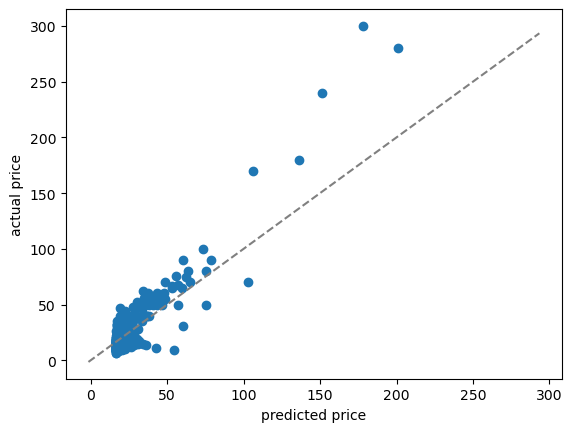

In [45]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_train), y_train)

ax.set_xlabel("predicted price")
ax.set_ylabel("actual price")
ax.plot(x,x, linestyle="--", color="grey")

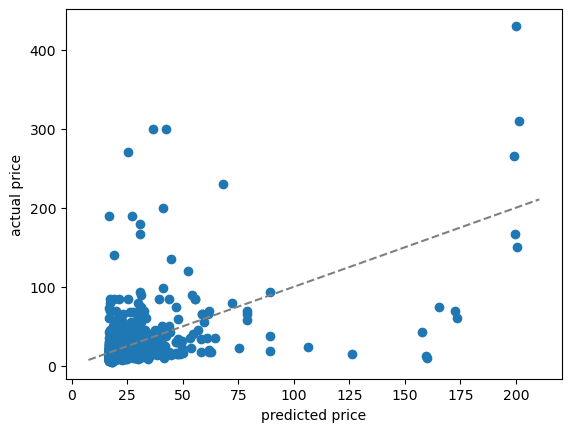

In [46]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_test), y_test)

ax.set_xlabel("predicted price")
ax.set_ylabel("actual price")
x = np.array(ax.get_xlim())
ax.plot(x,x, linestyle="--", color="grey")

## Instead of wine quality or price, let's try to predict what grapes were used in the wine

In [49]:
df

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,sauvignon blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,pinot noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley
5,Louis Roederer 'Cristal' Champagne 2015,Cristal is Louis Roederer’s flagship wine. It ...,£300.00 per bottle,75CL,chardonnay,NaN,Natural Cork,France,9.0,NaN,per bottle,White,ABV 12.00%,NaN,NaN,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",Although Denis Meunier is only in his late 20s...,£11.99 per bottle,75CL,chenin blanc,NaN,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,ABV 12.50%,Loire,Aromatic & Floral,2021,Vouvray
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",Waimea’s vineyards are less than 1km from the ...,£13.99 per bottle,75CL,pinot noir,NaN,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,ABV 13.00%,Nelson,Delicate & Dry,2021,NaN
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,Made from the very best fruit nourished by 40-...,£85.00 per bottle,75CL,cabernet sauvignon,NaN,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,ABV 13.50%,South Australia,Savoury & Full Bodied,2010,Clare Valley
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,"In 1961, Sir Robert Menzies said that Yalumba'...",£37.99 per bottle,75CL,cabernet sauvignon,NaN,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,ABV 14.50%,South Australia,Savoury & Full Bodied,2016,Coonawarra


In [118]:
len(valid_grapes)

68

In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# ---- 1️⃣ Load and clean data ----
df_wordy = pd.read_csv("WineDataset.csv")
mask = df_wordy["Vintage"].astype(str).str.isnumeric() & df_wordy["Price"].str.contains(" per bottle")
df = df_wordy[mask].copy()

# Extract price
df["Price_value"] = df["Price"].str.split(" per bottle").str[0].str[1:].astype(float)

# Filter grape occurrences
grape_counts = df["Grape"].value_counts()
valid_grapes = grape_counts[grape_counts >= 2].index
df = df[df["Grape"].isin(valid_grapes)].copy()

# Normalize grape column
df["Grape"] = df["Grape"].str.lower().str.strip()

# Define features
numeric_features = ["Price_value", "Vintage"]
text_features = ["Region", "Appellation", "Style"]

# Clean text features
df[text_features] = df[text_features].fillna("")
df[text_features] = df[text_features].apply(lambda col: col.str.lower().str.strip())

# Label encode AFTER filtering
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Grape"])

# Build feature matrix
X = df[numeric_features + text_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer([
    ("style", TfidfVectorizer(max_features=1000), "Style"),
    ("region", TfidfVectorizer(max_features=500), "Region"),
    ("appellation", TfidfVectorizer(max_features=500), "Appellation"),
], remainder="passthrough")

# Pipeline
model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42))
])

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                    precision    recall  f1-score   support

          albarino       1.00      0.40      0.57         5
 alicante bouschet       0.00      0.00      0.00         1
         alvarinho       0.50      1.00      0.67         1
         assyrtiko       0.00      0.00      0.00         1
           bacchus       0.00      0.00      0.00         2
           barbera       0.00      0.00      0.00         1
    cabernet franc       0.00      0.00      0.00         2
cabernet sauvignon       0.67      0.83      0.74        35
          carignan       0.00      0.00      0.00         2
         carménère       0.00      0.00      0.00         2
          castelão       1.00      0.50      0.67         2
        chardonnay       0.78      0.86      0.82        65
      chenin blanc       0.25      0.12      0.17         8
          cinsault       0.00      0.00      0.00         3
         colombard       0.00      0.00      0.00         1
           cortese       1.00      1.00

c:\Users\pietr\anaconda3\envs\data_science\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pietr\anaconda3\envs\data_science\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pietr\anaconda3\envs\data_science\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [122]:
TOP_N = 3
y_proba = model.predict_proba(X_test)
top_n_preds_idx = np.argsort(y_proba, axis=1)[:, -TOP_N:][:, ::-1]  # descending sort

# Correctly decode the top-N indices into class labels (grape names)
top_n_grape_preds = np.array([
    label_encoder.inverse_transform(row) for row in top_n_preds_idx
])

# Show results for the first few samples
for i in range(5):
    print(f"\nSample {i + 1}: {valid_grapes[y_test[i]]}")
    for rank, class_idx in enumerate(top_n_preds_idx[i]):
        grape = label_encoder.inverse_transform([class_idx])[0]
        prob = y_proba[i][class_idx]
        print(f"  Top {rank + 1}: {grape} ({prob:.2%})")



Sample 1: Assyrtiko
  Top 1: pinot noir (59.90%)
  Top 2: chenin blanc (15.50%)
  Top 3: sauvignon blanc (13.00%)

Sample 2: Touriga Nacional
  Top 1: malbec (81.50%)
  Top 2: tempranillo (5.50%)
  Top 3: chardonnay (5.00%)

Sample 3: Alicante Bouschet
  Top 1: zinfandel (69.50%)
  Top 2: chardonnay (10.00%)
  Top 3: malbec (7.50%)

Sample 4: Mourvèdre
  Top 1: malbec (75.00%)
  Top 2: merlot (6.00%)
  Top 3: castelão (3.83%)

Sample 5: Grenache Blanc
  Top 1: gruner veltliner (72.00%)
  Top 2: chardonnay (13.50%)
  Top 3: sauvignon blanc (8.00%)


In [123]:
def top_n_accuracy(y_true, y_proba, n=3):
    top_n_preds = np.argsort(y_proba, axis=1)[:, -n:]
    match_array = [y in top_n for y, top_n in zip(y_true, top_n_preds)]
    return np.mean(match_array)

# Top-3 accuracy
top3_acc = top_n_accuracy(y_test, y_proba, n=3)
print(f"Top-3 Accuracy: {top3_acc:.2%}")

# Optionally, try Top-5
top5_acc = top_n_accuracy(y_test, y_proba, n=5)
print(f"Top-5 Accuracy: {top5_acc:.2%}")

Top-3 Accuracy: 82.08%
Top-5 Accuracy: 87.97%


In [ ]:
y_pred_top1 = np.argmax(y_proba, axis=1)
cm = confusion_matrix(y_test, y_pred_top1, normalize='true')  # normalize by true class size

f,ax = plt.subplots(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical', ax=ax)
ax.set_title("Normalized Confusion Matrix")

plt.show()

C:\Users\pietr\AppData\Local\Temp\ipykernel_18592\3460342946.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
